### importing basic libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.io
import math
import cmath
import warnings
from numpy import sin,cos,pi,exp
import scipy.fftpack as sf
import scipy.signal as sg
%matplotlib inline

### 1. The ECG signal is given in MATLAB file format as “givenECG3.mat”. Sampling frequency is 360 Hz.

In [2]:
Mat=scipy.io.loadmat("givenECG3.mat")
print(Mat)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Jan 10 19:30:32 2017', '__version__': '1.0', '__globals__': [], 'givenECG3': array([[995, 995, 995, ..., 946, 944, 943]], dtype=uint16)}


In [3]:
Mat['givenECG3']

array([[995, 995, 995, ..., 946, 944, 943]], dtype=uint16)

In [4]:
ECG=Mat['givenECG3'][0]
print(ECG)

[995 995 995 ... 946 944 943]


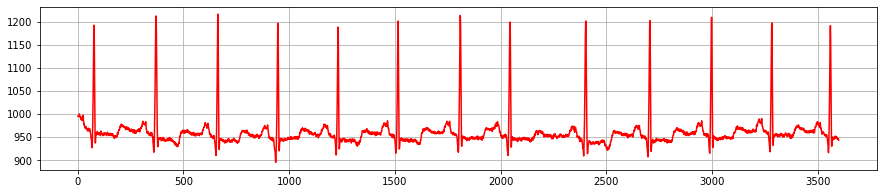

In [5]:
plt.figure(figsize=(15,3))
plt.plot(ECG,"r")
plt.grid()

In [6]:
#as it's visible that no of peak are 13 
R_peak_count=13
print(len(ECG))

3600


In [7]:
switching_freq=360
time_covered=int(len(ECG)/switching_freq)
print(time_covered)

10


In [8]:
Realization_time=len(ECG)/switching_freq
print("The time under the inspection f ECG IS    :",Realization_time)

The time under the inspection f ECG IS    : 10.0


In [9]:
avg_sample_onePulse=int(len(ECG)/R_peak_count)
avg_sample_onePulse

276

In [10]:
Max=[]
index=[]
for i in range (1,14):
    p=0
    p=max(ECG[276*(i-1):i*276])
    Max.append(p)        

(a) Detect the R-peak in each beat of the ECG signal.

In [11]:
Max=np.array(Max)
print("the vaious peak obtained are:   ",Max)

the vaious peak obtained are:    [1192 1212 1216 1196 1188 1201 1213 1199 1201 1202 1209 1197 1191]


In [12]:
for i in range(13):
    for t in range(276*(i),(i+1)*276):
        if(ECG[t]==Max[i]):
            index.append(t)

In [13]:
print("THe peaks are obtained at the samples of  :", index)

THe peaks are obtained at the samples of  : [77, 370, 663, 947, 1231, 1515, 1809, 2045, 2403, 2706, 2998, 3283, 3560]


In [14]:
index_diff=[]
for i in range(12):
    p=index[i+1]-index[i]
    index_diff.append(p)

b) Evaluate the RR-interval between the consecutive beats of the ECG signal.

In [15]:
RR_interval=index_diff
print("the RR interval is",RR_interval,("sample"))

the RR interval is [293, 293, 284, 284, 284, 294, 236, 358, 303, 292, 285, 277] sample


In [16]:
print("tha average Heart rate samples present is the signal is:",np.average(np.array(index_diff)))

tha average Heart rate samples present is the signal is: 290.25


In [17]:
print("beats of one second is",360/290.25)

beats of one second is 1.2403100775193798


In [18]:
print("HEART RATE of one minute is",1.2403100775193798*60)

HEART RATE of one minute is 74.4186046511628


In [19]:
HR=[]
for i in range(len(RR_interval)):
    P=(360/RR_interval[i])*60
    HR.append(P)
print("Mean of the signal is :",np.mean(HR))
print(HR)

Mean of the signal is : 74.99723655197333
[73.72013651877134, 73.72013651877134, 76.05633802816902, 76.05633802816902, 76.05633802816902, 73.46938775510205, 91.52542372881355, 60.33519553072626, 71.28712871287128, 73.97260273972603, 75.78947368421052, 77.9783393501805]


In [20]:
print("the standard deviation of the Heart rate signal is:",np.std(HR))

the standard deviation of the Heart rate signal is: 6.59195965553168


#### 2. Given an ECG signal “inputECG.mat”, add random noise to it. The sampling rate is 360 Hz. (You may use numpy.random package for generating noise)
#### a. Perform synchronized averaging to remove the noise. Vary the number of realizations used for reconstruction of ECG signal. Plot the percentage root mean square difference (PRD) value versus the iteration number.

In [21]:
INP=scipy.io.loadmat("inputECG.mat")
INP

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Jan 25 12:30:29 2017',
 '__version__': '1.0',
 '__globals__': [],
 'inputECG': array([[995, 995, 995, ..., 946, 944, 943]], dtype=uint16)}

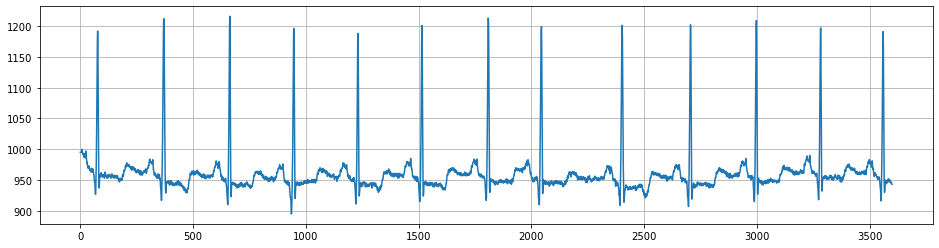

In [22]:
plt.figure(figsize=(16,4))

inp=INP['inputECG'][0]
plt.plot(inp)
plt.grid()

### Doing Synchrnous averaging on above ECG

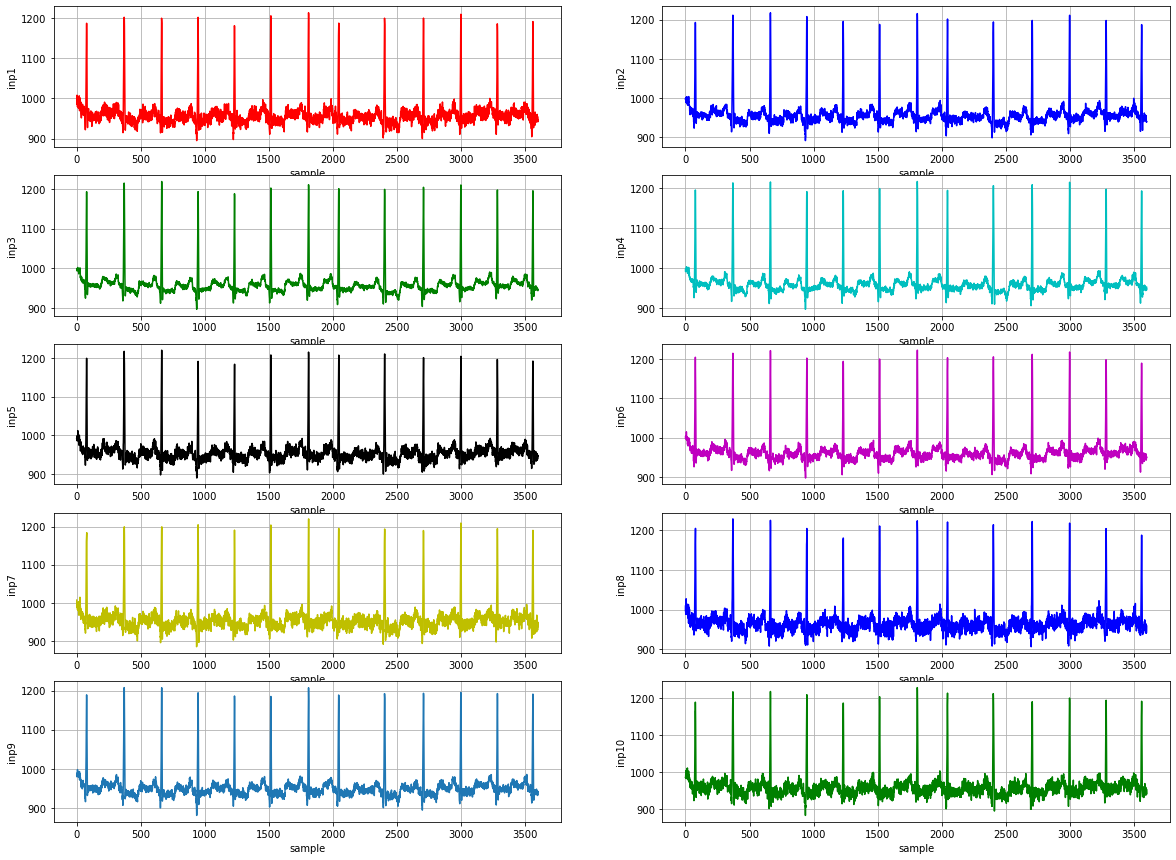

In [23]:
plt.figure(figsize=(20,15))
plt.subplot(521)
inp1=np.random.normal(0,8,3600)+ECG
plt.plot(inp1,"r")
plt.xlabel("sample")
plt.ylabel("inp1")
plt.grid()

plt.subplot(522)
inp2=np.random.normal(-1,5,3600)+ECG
plt.plot(inp2,"b")
plt.xlabel("sample")
plt.ylabel("inp2")
plt.grid()

plt.subplot(523)
inp3=np.random.normal(1,2,3600)+ECG
plt.plot(inp3,"g")
plt.xlabel("sample")
plt.ylabel("inp3")
plt.grid()

plt.subplot(524)
inp4=np.random.normal(2,3,3600)+ECG
plt.plot(inp4,"c")
plt.xlabel("sample")
plt.ylabel("inp4")
plt.grid()

plt.subplot(525)
inp5=np.random.normal(-2,7,3600)+ECG
plt.plot(inp5,"k")
plt.xlabel("sample")
plt.ylabel("inp5")
plt.grid()

plt.subplot(526)
inp6=np.random.normal(4,5,3600)+ECG
plt.plot(inp6,"m")
plt.xlabel("sample")
plt.ylabel("inp6")
plt.grid()

plt.subplot(527)
inp7=np.random.normal(-4,9,3600)+ECG
plt.plot(inp7,"y")
plt.xlabel("sample")
plt.ylabel("inp7")
plt.grid()

plt.subplot(528)
inp8=np.random.normal(7,10,3600)+ECG
plt.plot(inp8,"b")
plt.xlabel("sample")
plt.ylabel("inp8")
plt.grid()

plt.subplot(529)
inp9=np.random.normal(-7,5,3600)+ECG
plt.plot(inp9)
plt.xlabel("sample")
plt.ylabel("inp9")
plt.grid()

plt.subplot(5,2,10)
inp10=np.random.normal(0,9,3600)+ECG
plt.plot(inp10,"g")
plt.xlabel("sample")
plt.ylabel("inp10")
plt.grid()


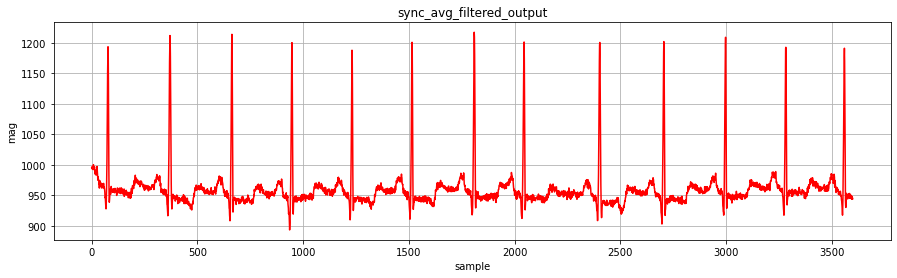

In [24]:
plt.figure(figsize=(15,4))
sync_filtered_out=(inp1+inp2+(inp3)+inp4+(inp5)+inp6+(inp7)+inp8+(inp9)+inp10)/10
plt.plot(sync_filtered_out,"r")
plt.xlabel("sample")
plt.ylabel("mag")
plt.title("sync_avg_filtered_output")
plt.grid()

In [25]:
#varrying the no of realization to get the reconstructed signal
realization=np.array([inp1,inp2,inp3,inp4,inp5,inp6,inp7,inp8,inp9,inp10])
plotting=[]
p=0
for i in range (len(realization)):
    y=realization[i]
    p=(p+y)
    plotting.append(p)

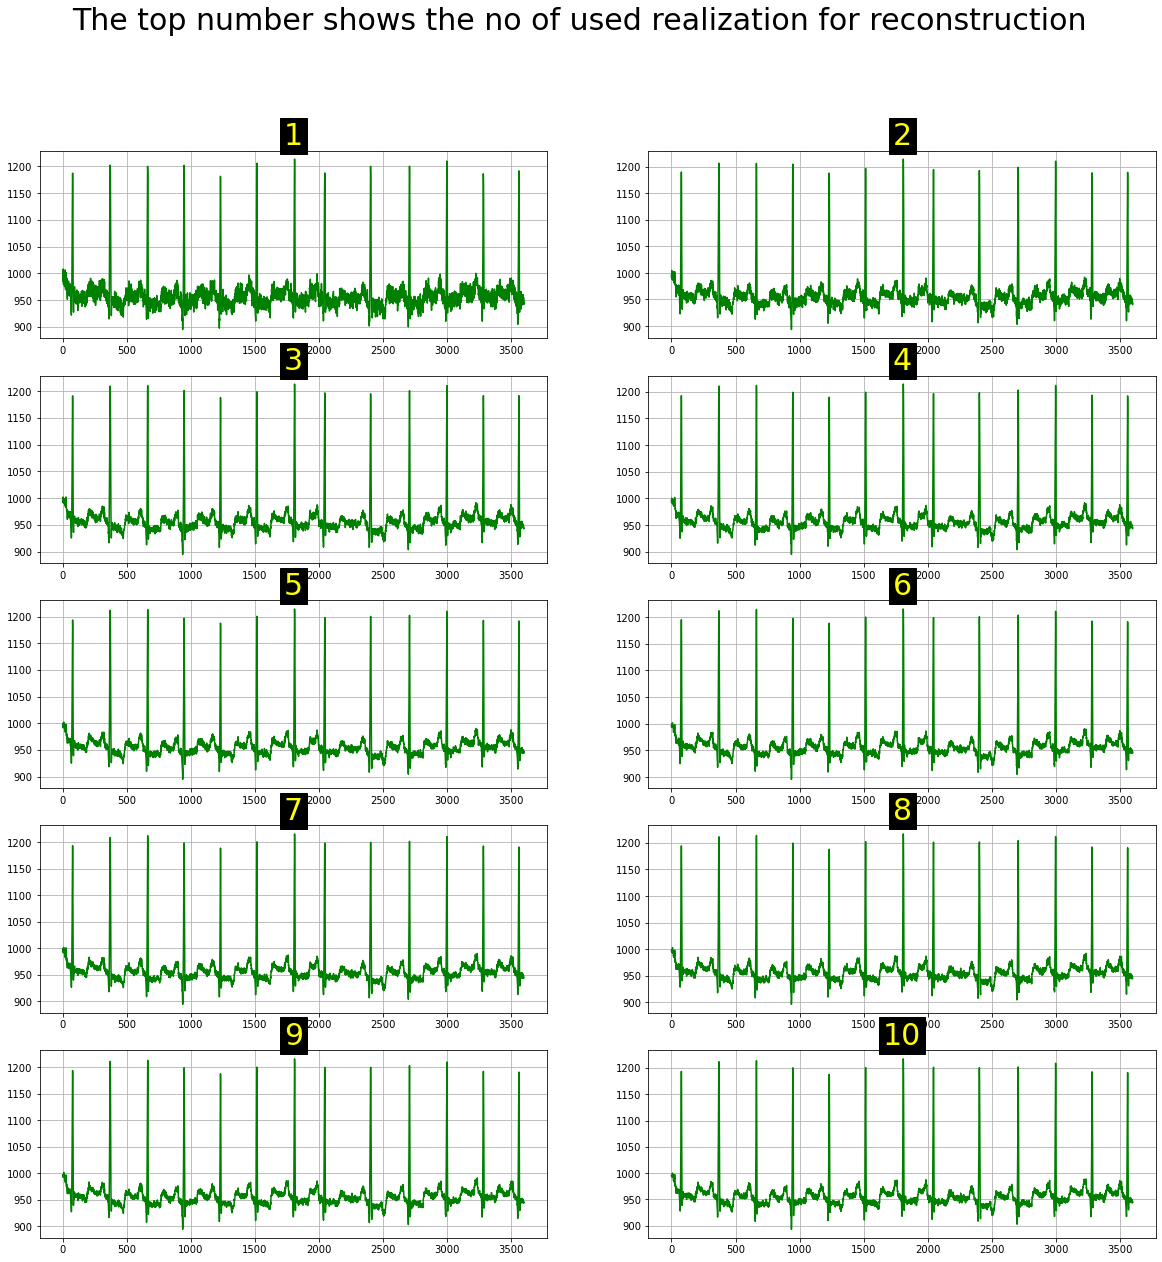

In [26]:
diff_itt_filter_output=[]
plt.figure(figsize=(20,20))
for i in range(10):
    plt.subplot(5,2,i+1)
    p=np.array(plotting[i]/(i+1))
    diff_itt_filter_output.append(p)
    plt.plot(p,"g")
    plt.suptitle('The top number shows the no of used realization for reconstruction', fontsize=30)
    plt.title(i+1, fontsize='30', backgroundcolor='black', color='yellow') 
    plt.grid()

In [27]:
#Plot the percentage root mean square difference (PRD) value versus the iteration number
PRD=[]
for i in range(10):
    P=0
    P=sum((ECG-diff_itt_filter_output[i])**2)
    P=(P/len(ECG))**.5
    PRD.append(P)

Text(0, 0.5, 'PRD')

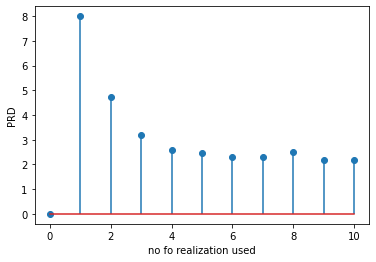

In [28]:
plt.stem(np.concatenate((np.array([0]),np.array(PRD))),use_line_collection=True)
plt.xlabel("no fo realization used")
plt.ylabel("PRD")

### 3. Given the ECG signal, “givenECG3.mat”. The sampling rate is 360 Hz.
#### a. Add baseline wander noise (0-1 Hz sinusoid) and powerline interference (50 Hz sinusoid) to it. Use various filters to eliminate these noises from ECG.
#### b. Compute PRD value between the filtered signal and the original ECG signal for each filtering case.

In [29]:
DATA=scipy.io.loadmat("givenECG3.mat")
DATA

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Jan 10 19:30:32 2017',
 '__version__': '1.0',
 '__globals__': [],
 'givenECG3': array([[995, 995, 995, ..., 946, 944, 943]], dtype=uint16)}

Text(0.5, 1.0, 'ECG')

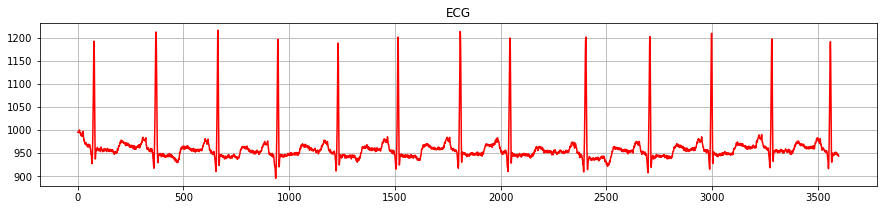

In [30]:
plt.figure(figsize=(15,3))
data=DATA['givenECG3'][0]
plt.plot(data,"r")
plt.grid()
plt.title("ECG")

Text(0.5, 1.0, 'ECG+powerline interference')

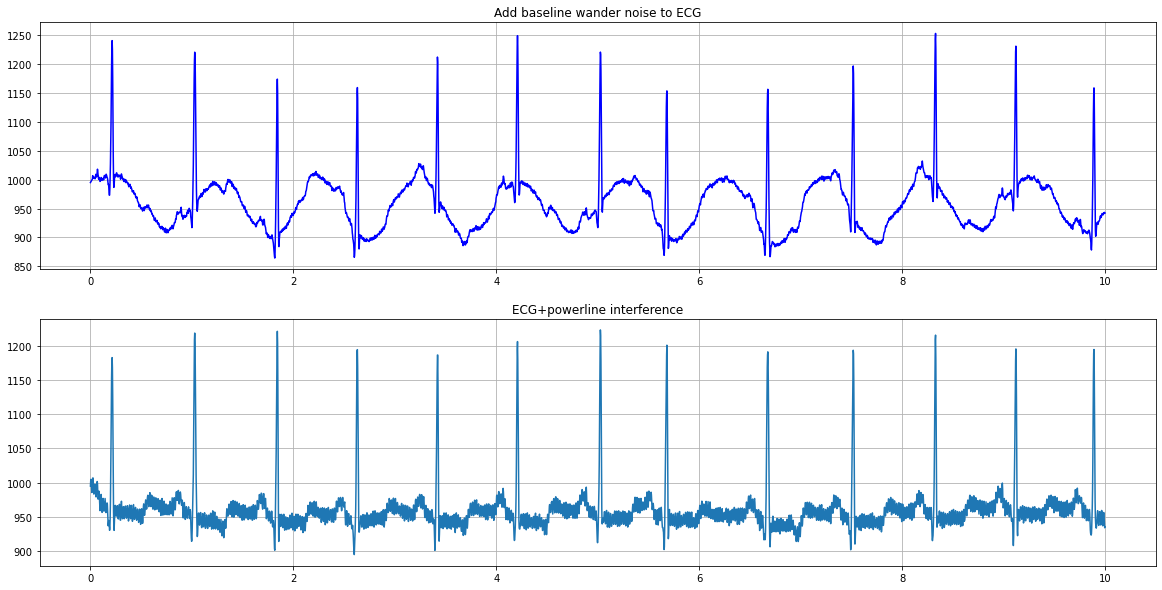

In [31]:
plt.figure(figsize=(20,10))
t=10
Fs=360
n=np.arange(0,10,1/360)
f=1
sig1=ECG+50*sin(2*pi*f*n)     #REMEMBER 10 milivolt
plt.subplot(2,1,1)
plt.plot(n,sig1,"b")
plt.grid()
plt.title("Add baseline wander noise to ECG")

#taking power line interfernce to be (1/200) times
plt.subplot(2,1,2)
f=50
sig2=ECG+10*sin(2*pi*f*n)
plt.plot(n,sig2,)
plt.grid()
plt.title("ECG+powerline interference")

In [32]:
# filtering the Sig1 and Sig2

In [33]:
    def DFT(Xn,N):     #defining the DFT
        Xk_coeff=[]    #to store the result coeff
        for k in range (N):
            p=0
            for i in range(N):
                p=p+Xn[i]*exp((-2j*pi/N)*k*i)
            Xk_coeff.append(p)
        return Xk_coeff
    def IDFT(Xk_coeff,N):     #defining the IDFT
        Xn=[]
        for i in range (N):
            p=0
            for k in range(len(Xk_coeff)):
                p=p+Xk_coeff[k]*exp((2j*pi/N)*k*i)
            Xn.append(p)
        return (np.array(Xn)/N)

In [34]:

#https://www.ijser.org/researchpaper/Various-Techniques-for-Removal-of-Power-Line-Interference-From-ECG-Signal.pdf


def hanning_wind(k):
    Hann=[]
    for i in range(k):
        Hann.append(0.5*(1-1*np.cos( (2*np.pi*i)/(k-1) )))
    return np.array(Hann)

Text(0, 0.5, 'amplitude')

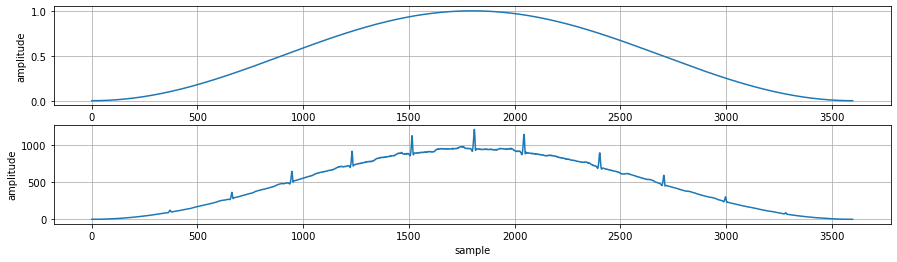

In [35]:
plt.figure(figsize=(15,4))
hann=hanning_wind(len(ECG))

plt.subplot(2,1,1)
plt.grid()
plt.plot(hann)
plt.xlabel("sample")
plt.ylabel("amplitude")

plt.subplot(2,1,2)
plt.grid()
plt.plot(abs(IDFT((np.array((DFT((np.multiply(ECG,hann)),len(ECG))))),len(ECG))))
plt.xlabel("sample")
plt.ylabel("amplitude")

# USING HEARTPY LIBRARY

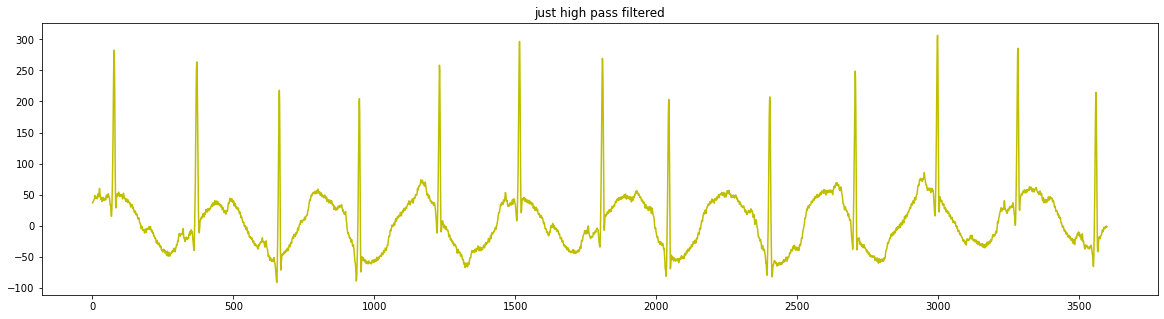

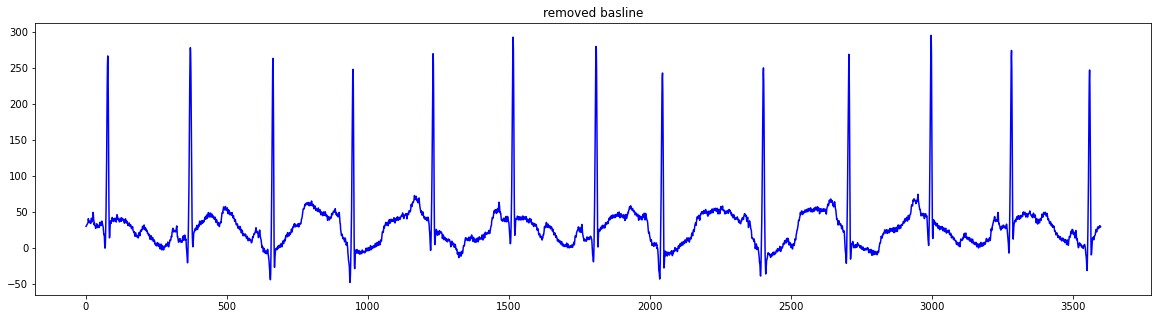

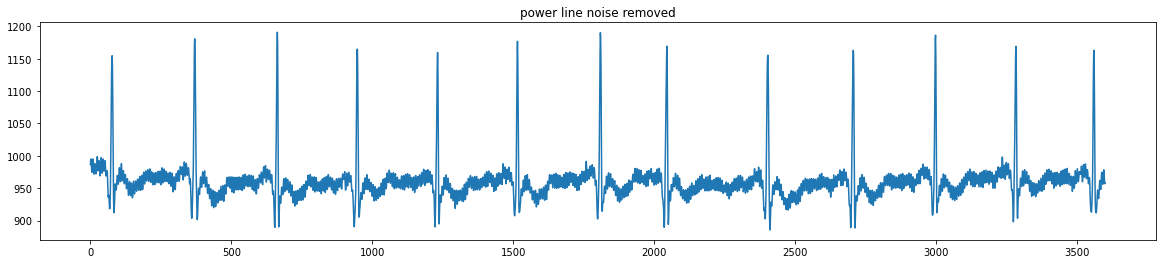

In [36]:
import heartpy as hp
filtered1 = hp.filter_signal(sig1,cutoff=0.05,sample_rate =3600, filtertype='highpass')
filtered2 = hp.remove_baseline_wander(filtered1,sample_rate=3600,cutoff=0.05)
plt.figure(figsize=(20,5))
plt.title("just high pass filtered")
plt.plot(filtered1,"y")
plt.figure(figsize=(20,5))
plt.plot(filtered2,"b")
plt.title("removed basline")





#notch
plt.figure(figsize=(20,4))
plt.title("power line noise removed")
b_notch, a_notch = sg.iirnotch(50, 2 ,3600)              #need to maintain quality factor otw distotion would increase
freq, h = sg.freqz(b_notch, a_notch, 3600) 
outputSignal = sg.filtfilt(b_notch, a_notch,sig2) 
plt.plot(outputSignal)



# using wiener

Text(0.5, 1.0, 'filtered POWER LINE SIG: SIG2')

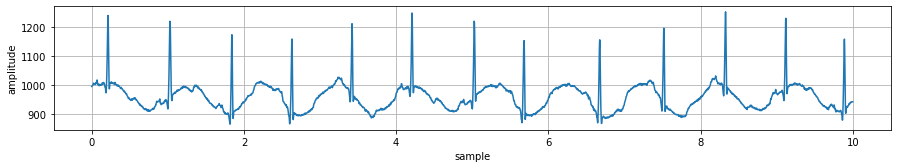

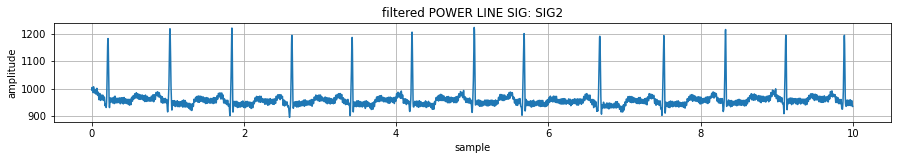

In [39]:
from scipy import signal as sg
plt.figure(figsize=(15,5))

hann=hanning_wind(len(sig1))
filt1=sg.wiener(sig1,noise=True)
plt.subplot(2,1,1)
plt.grid()
plt.plot(n,filt1)
plt.xlabel("sample")
plt.ylabel("amplitude")
plt.figure(figsize=(15,4))
plt.title("filtered BASE LINE WANDER SIG: SIG1")



hann=hanning_wind(len(sig2))
filt2=sg.wiener(sig2,noise=True)
plt.subplot(2,1,2)
plt.grid()
plt.plot(n,filt2)
plt.xlabel("sample")
plt.ylabel("amplitude")
plt.title("filtered POWER LINE SIG: SIG2")

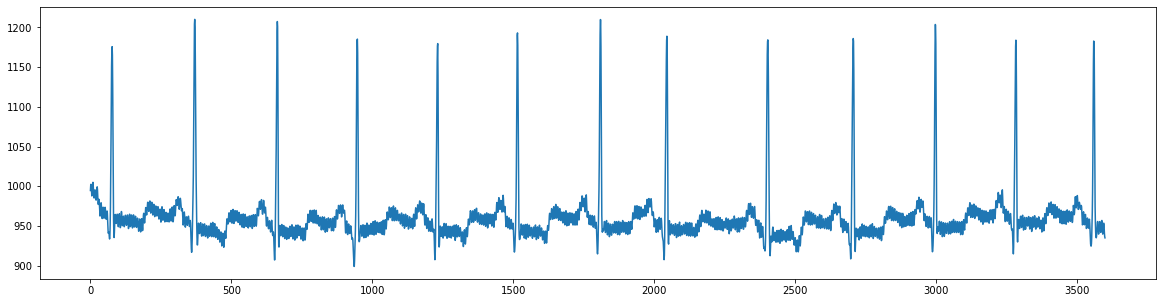

In [40]:
plt.figure(figsize=(20,5))
plt.plot(sg.wiener(sig2))

### REMARK:::SYNCHRONOUS AVERAGING WON'T WORK HERE

In [41]:
#PRD CALCULATION

In [42]:
def PRD(x,y):
    num = np.sum((x-y)**2)
    den = len(x)
    result = 100*np.sqrt(num)/den
    return result


In [43]:
print("THE PRD OF THE WIENER OUTPUT FOR BASE LINE   : ",PRD(filt1,data))
print("THE PRD OF THE WIENER OUTPUT FOR POWERLINE   : ",PRD(filt2,data))

THE PRD OF THE WIENER OUTPUT FOR BASE LINE   :  58.9277246066689
THE PRD OF THE WIENER OUTPUT FOR POWERLINE   :  11.4258313064283
